In [68]:
!pip install keras

In [69]:
!pip install tensorflow

In [70]:
import keras
import tensorflow as tf
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop
from keras.models import Sequential
from tensorflow.keras.utils import plot_model

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [72]:
from google.colab import files
uploaded=files.upload()


Saving Alphabets_data.csv to Alphabets_data (1).csv


In [73]:
#Importing the data
df=pd.read_csv('Alphabets_data.csv')

In [74]:
df

,letter,0,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [75]:
#Basic analysis
df.head()

,letter,0,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [ ]:
df.shape

(20000, 17)

In [ ]:
df.size

340000

In [76]:
df.letter.value_counts()

letter
U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: count, dtype: int64

In [ ]:
df['letter'].values

array(['T', 'I', 'D', ..., 'T', 'S', 'A'], dtype=object)

In [77]:
#Checking null values and duplicates:
df.isnull().sum()

letter    0
0         0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [78]:
df.duplicated().sum()

1332

In [79]:
df.drop_duplicates(inplace=True)

In [80]:
df.duplicated().sum()

0

In [81]:
target=df.iloc[:,0]

In [82]:
target

0        T
1        I
2        D
3        N
4        G
        ..
19994    T
19995    D
19996    C
19997    T
19999    A
Name: letter, Length: 18668, dtype: object

In [83]:
features=df.iloc[:,1:]
features

,0,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,5,8,7,7,7,7,9,4,8,7,7,8,3,10,8,6
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4


In [89]:
#Training the Model
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100)

In [90]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(14934, 16)
(3734, 16)
(14934,)
(3734,)


In [91]:
per=Perceptron()

In [92]:
per.fit(x_train,y_train)

Perceptron()

In [93]:
y_pred=per.predict(x_test)

In [94]:
accuracy_score(y_test,y_pred)

0.4895554365291912

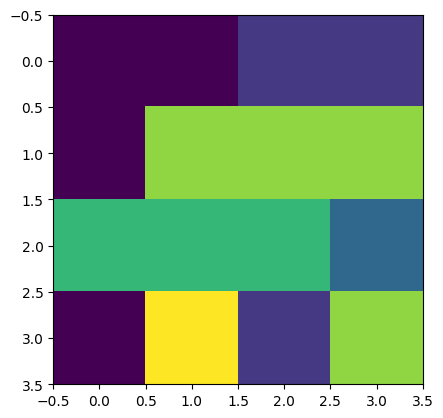

In [95]:
img=features.loc[19995].values.reshape(4,4)
plt.imshow(img)

In [96]:
# Normalizing the data
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(14934, 16)
(3734, 16)
(14934,)
(3734,)


In [97]:
x_train=x_train.astype('float')
x_test=x_test.astype('float')

In [98]:
x_train/=255
x_test/=255

In [99]:
print(x_train.shape)
print(x_test.shape)

(14934, 16)
(3734, 16)


In [101]:
y_train

19143    Y
19064    Y
1301     G
9246     O
7923     L
        ..
17354    I
79       N
12770    V
14992    C
5817     E
Name: letter, Length: 14934, dtype: object

In [102]:
y_test

3062     M
6881     X
5118     Q
2313     W
13936    D
        ..
14296    S
6357     D
7345     H
17168    Y
17193    T
Name: letter, Length: 3734, dtype: object

In [103]:
y_train.shape

(14934,)

In [104]:
y_train=pd.Categorical(y_train).codes
y_test=pd.Categorical(y_test).codes

In [105]:
y_train

array([24, 24,  6, ..., 21,  2,  4], dtype=int8)

In [106]:
y_train[0]

24

In [107]:
y_train[1]

24

In [108]:
y_test

array([12, 23, 16, ...,  7, 24, 19], dtype=int8)

In [109]:
y_test[0]

12

In [110]:
y_test[1]

23

In [ ]:
# Model building

In [111]:
epochs=4
batch_size=200
n_classes=10

In [113]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(16,)))
model.add(tf.keras.layers.Dense(200,activation='relu',input_shape=[256]))
model.add(tf.keras.layers.Dense(150,activation='relu'))
model.add(tf.keras.layers.Dense(n_classes,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 200)               3400      
                                                                 
 dense_8 (Dense)             (None, 150)               30150     
                                                                 
 dense_9 (Dense)             (None, 10)                1510      
                                                                 
Total params: 35060 (136.95 KB)
Trainable params: 35060 (136.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
##plot model

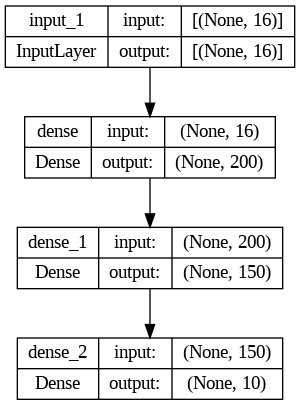

In [ ]:
plot_model(model,show_shapes=True)

In [ ]:
#Compiling the model

In [ ]:
from keras.utils import custom_object_scope
from keras.optimizers import RMSprop
from keras.losses import categorical_crossentropy

In [ ]:
def compile_model(model):
    with custom_object_scope({'categorical_crossentropy':categorical_crossentropy}):
      model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics='accuracy')

In [ ]:
y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10)

In [ ]:
model.layers[-1]=tf.keras.layers.Dense(1,activation='sigmoid')

In [ ]:
# Model compileation

In [ ]:
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics='accuracy')

In [ ]:
#Model validation

In [ ]:
history=model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(x_test,y_test))

Epoch 1/4
75/75 [==============================] - 1s 7ms/step - loss: 0.8938 - accuracy: 0.0396 - val_loss: 0.9123 - val_accuracy: 0.0370
Epoch 2/4
75/75 [==============================] - 0s 4ms/step - loss: 0.9107 - accuracy: 0.0393 - val_loss: 0.8881 - val_accuracy: 0.0370
Epoch 3/4
75/75 [==============================] - 0s 4ms/step - loss: 0.8933 - accuracy: 0.0401 - val_loss: 0.8762 - val_accuracy: 0.0348
Epoch 4/4
75/75 [==============================] - 0s 4ms/step - loss: 0.8879 - accuracy: 0.0577 - val_loss: 0.8892 - val_accuracy: 0.0260


In [ ]:
print(model.output_shape)

(None, 10)


In [ ]:
print(model.input_shape)

(None, 16)


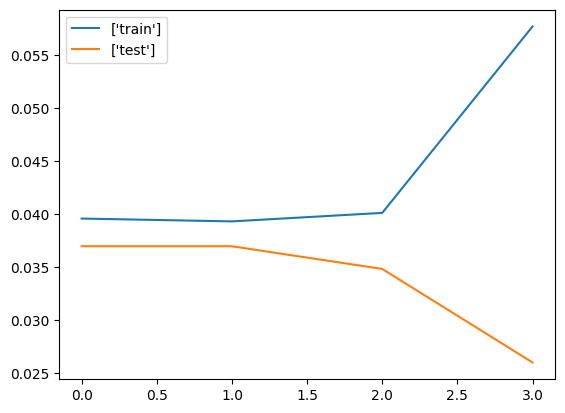

In [ ]:
plt.plot(range(4),history.history['accuracy'],label=['train'])
plt.plot(range(4),history.history['val_accuracy'],label=['test'])
plt.legend(loc='best')

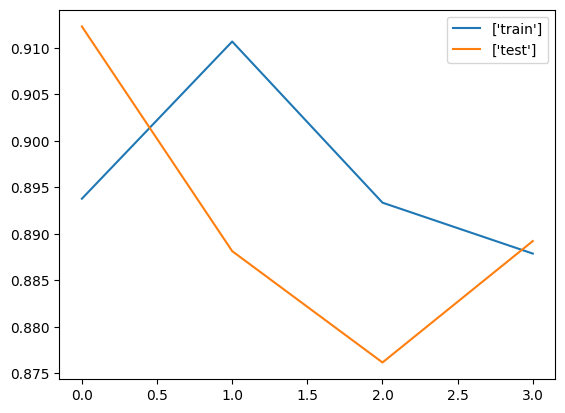

In [ ]:
plt.plot(range(4),history.history['loss'],label=['train'])
plt.plot(range(4),history.history['val_loss'],label=['test'])
plt.legend(loc='best')

In [173]:
# Hyper parameter tuning:

In [169]:
params={'activation':['relu','tanh'],
        'learning_rate':['adaptive','invscaling','constant']}

In [170]:
estimator=MLPClassifier()
grid_search=GridSearchCV(estimator,params,cv=5)

In [171]:
grid_search.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['relu', 'tanh'],
                         'learning_rate': ['adaptive', 'invscaling',
                                           'constant']})

In [172]:
grid_search.best_params_

{'activation': 'tanh', 'learning_rate': 'adaptive'}